## 加载R包

In [1]:
library(CellChat)
library(patchwork)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



## 读取数据并进行样本分割

In [2]:
adata = readRDS("/home/zhangyinan/TXL_new/1_basic_data_processing/Integrate/result/ST_Integrate.rds")
adata

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:igraph’:

    components




An object of class Seurat 
48702 features across 5435 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 2 other assays present: Spatial, SCT
 3 dimensional reductions calculated: pca, umap, tsne
 2 spatial fields of view present: control3_model1_treatment2 control5_model2_treatment3

In [3]:
anno_c3m1t2 = read.csv("/home/zhangyinan/TXL_new/4_cell2location/Integrate/Control3_Model1_Treatment2/result/annotation_202507.csv",row.names = 1)
dim(anno_c3m1t2)

[1] 2912    3

In [4]:
# 加载位置信息
source_c3m1t2 = read.csv('/home/zhangyinan/TXL_new/1_basic_data_processing/Control3_Model1_Treatment2/result/source_c3_m1_t2.csv',row.names = 1)
dim(source_c3m1t2)

anno_c3m1t2 = anno_c3m1t2[source_c3m1t2$source %in% c("control3", "model1", "treatment2"), ]
dim(anno_c3m1t2)

rownames(anno_c3m1t2) <- paste0(rownames(anno_c3m1t2), "_1")
head(anno_c3m1t2)

[1] 2912    4

[1] 2769    3

,cell_type_c2l,sub_type_c2l,singleR
,<chr>,<chr>,<chr>
AAACAAGTATCTCCCA-1_1,Neurons,Fibroblasts,Neurons
AAACACCAATAACTGC-1_1,Neurons,Glutamatergic Neurons,Neurons
AAACAGAGCGACTCCT-1_1,Neurons,GABAergic Neurons,Neurons
AAACAGCTTTCAGAAG-1_1,Neurons,Mature Oligodendrocytes,Oligodendrocytes
AAACAGGGTCTATATT-1_1,Neurons,GABAergic Neurons,Neurons
AAACATGGTGAGAGGA-1_1,Neurons,Glutamatergic Neurons,Neurons


In [5]:
anno_c5m2t3 = read.csv("/home/zhangyinan/TXL_new/4_cell2location/Integrate/Control5_Model2_Treatment3/result/annotation_202507.csv",row.names = 1)
dim(anno_c5m2t3)

rownames(anno_c5m2t3) <- paste0(rownames(anno_c5m2t3), "_2")
head(anno_c5m2t3)

[1] 2666    3

,cell_type_c2l,sub_type_c2l,singleR
,<chr>,<chr>,<chr>
AAACAATCTACTAGCA-1_2,Neurons,Glutamatergic Neurons,Neurons
AAACACCAATAACTGC-1_2,Astrocytes,Astrocytes,Neurons
AAACAGAGCGACTCCT-1_2,Neurons,Glutamatergic Neurons,Neurons
AAACCACTACACAGAT-1_2,Oligodendrocytes,Mature Oligodendrocytes,Oligodendrocytes
AAACCGGGTAGGTACC-1_2,Neurons,GABAergic Neurons,Neurons
AAACCGTTCGTCCAGG-1_2,Neurons,Mature Oligodendrocytes,Oligodendrocytes


In [6]:
# 合并注释表格
anno = rbind(anno_c3m1t2, anno_c5m2t3)
dim(anno)

[1] 5435    3

In [7]:
identical(rownames(adata@meta.data), rownames(anno))

[1] TRUE

In [8]:
# 添加注释信息至seurat对象meta.data中
adata@meta.data <- cbind(adata@meta.data, anno[, 1:3])
head(adata@meta.data)

,orig.ident,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,percent.mt,SCT_snn_res.0.8,seurat_clusters,slice,source,Source,percent_mito,integrated_snn_res.0.8,cell_type_c2l,sub_type_c2l,singleR
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
AAACAAGTATCTCCCA-1_1,SeuratProject,5051,2102,10082,2286,10.04353,0,0,control3_model1_treatment2,model1,model,10.04353,0,Neurons,Fibroblasts,Neurons
AAACACCAATAACTGC-1_1,SeuratProject,33162,6191,10691,3585,16.54515,8,9,control3_model1_treatment2,treatment2,treatment,16.54515,9,Neurons,Glutamatergic Neurons,Neurons
AAACAGAGCGACTCCT-1_1,SeuratProject,11880,3517,11149,3509,19.60293,4,5,control3_model1_treatment2,control3,control,19.60293,5,Neurons,GABAergic Neurons,Neurons
AAACAGCTTTCAGAAG-1_1,SeuratProject,7773,2819,9859,2813,17.02646,3,1,control3_model1_treatment2,treatment2,treatment,17.02646,1,Neurons,Mature Oligodendrocytes,Oligodendrocytes
AAACAGGGTCTATATT-1_1,SeuratProject,16518,4538,11413,4418,12.95063,5,11,control3_model1_treatment2,treatment2,treatment,12.95063,11,Neurons,GABAergic Neurons,Neurons
AAACATGGTGAGAGGA-1_1,SeuratProject,39549,7064,11229,4251,10.30823,8,9,control3_model1_treatment2,treatment2,treatment,10.30823,9,Neurons,Glutamatergic Neurons,Neurons


In [9]:
adata_model1 = subset(adata, subset = source == "model1")
adata_model2 = subset(adata, subset = source == "model2")

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


## 创建cellchat对象前处理

In [10]:
# 提取表达矩阵
data.input1 = Seurat::GetAssayData(adata_model1, slot = "data", assay = "SCT")
data.input2 = Seurat::GetAssayData(adata_model2, slot = "data", assay = "SCT")

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [11]:
# 取交集基因
genes.common <- intersect(rownames(data.input1), rownames(data.input2))
data.input <- cbind(data.input1[genes.common, ], data.input2[genes.common, ])

In [12]:
Idents(adata_model1) = "sub_type_c2l"
Idents(adata_model2) = "sub_type_c2l"

# 定义meta数据
meta1 = data.frame(labels = Idents(adata_model1), samples = "model1")
meta2 = data.frame(labels = Idents(adata_model2), samples = "model2")
meta <- rbind(meta1, meta2)
rownames(meta) <- colnames(data.input)

In [15]:
# 设置factor水平
meta$labels <- factor(meta$labels, levels = levels(Idents(adata_model1)))
meta$samples <- factor(meta$samples, levels = c("model1", "model2"))

In [16]:
# 空间坐标
spatial.locs1 = Seurat::GetTissueCoordinates(adata_model1, scale = NULL, cols = c("imagerow", "imagecol")) 
spatial.locs1 = spatial.locs1[, -3]

spatial.locs2 = Seurat::GetTissueCoordinates(adata_model2, scale = NULL, cols = c("imagerow", "imagecol")) 
spatial.locs2 = spatial.locs2[, -3]

# 合并
spatial.locs <- rbind(spatial.locs1, spatial.locs2)
rownames(spatial.locs) <- colnames(data.input)

In [17]:
scalefactors1 = jsonlite::fromJSON(txt = file.path("/home/zhangyinan/TXL_new/1_basic_data_processing/Control3_Model1_Treatment2/data/control3--model1--Treatment2/spatial", 'scalefactors_json.json'))
spot.size = 55
conversion.factor1 = spot.size / scalefactors1$spot_diameter_fullres
spatial.factors1 = data.frame(ratio = conversion.factor1, tol = spot.size/2)

scalefactors2 = jsonlite::fromJSON(txt = file.path("//home/zhangyinan/TXL_new/1_basic_data_processing/Control5_Model2_Treatment3/data/control5_model2_Treatment3/spatial", 'scalefactors_json.json'))
spot.size = 55
conversion.factor2 = spot.size / scalefactors2$spot_diameter_fullres
spatial.factors2 = data.frame(ratio = conversion.factor2, tol = spot.size/2)

# 合并两个样本的 scale factor
spatial.factors <- rbind(spatial.factors1, spatial.factors2)
rownames(spatial.factors) <- c("model1", "model2")

## 创建cellchat对象

In [18]:
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "labels",
                           datatype = "spatial", coordinates = spatial.locs, spatial.factors = spatial.factors)

[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Fibroblasts, Microglia/Macrophage, Mature Oligodendrocytes, Glutamatergic Neurons, GABAergic Neurons, Astrocytes, Ependymal cell, Oligodendrocyte Precursor Cells 


In [19]:
cellchat

An object of class CellChat created from a single dataset 
 16142 genes.
 2327 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                     x_cent y_cent
AAACAAGTATCTCCCA-1_1   9846  11704
AAACATTTCCCGGATT-1_1  11744  11206
AAACCTAAGCAGCCGG-1_1  12433   9816
AAACGAGACGGTTGAT-1_1   7253   9425
AAACGGGCGTACGGGT-1_1  12434  10609
AAACGGTTGCGAACTG-1_1  12776   7434

In [21]:
# Set the ligand-receptor interaction database
CellChatDB <- CellChatDB.mouse
CellChatDB.use <- CellChatDB 
cellchat@DB <- CellChatDB.use

In [22]:
# subset the expression data of signaling genes for saving computation cost
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
future::plan("multisession", workers = 20) 
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
#> The number of highly variable ligand-receptor pairs used for signaling inference is 422

The number of highly variable ligand-receptor pairs used for signaling inference is 1377 


In [23]:
cellchat <- computeCommunProb(cellchat, 
                              type = "truncatedMean", trim = 0.1, 
                              distance.use = TRUE, 
                            #   interaction.range = 250, 
                              scale.distance = 1,
                            #   contact.dependent = TRUE, 
                              contact.range = 10)

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2025-10-30 19:40:47.632322]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-10-30 21:30:41.403742]"


In [24]:
# 默认情况下，每个细胞组中用于细胞间通信所需的最小细胞数为10
cellchat <- filterCommunication(cellchat, min.cells = 10)
# 在信号通路水平上推断细胞间通讯
cellchat <- computeCommunProbPathway(cellchat)
# 计算聚合的 cell-cell 通信网络
cellchat <- aggregateNet(cellchat)

The cell-cell communication related with the following cell groups are excluded due to the few number of cells:  Ependymal cell ! 	3.2% interactions are removed!


In [25]:
saveRDS(cellchat, file = "/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/cellchat_model.rds")

In [2]:
cellchat = readRDS("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/cellchat_model_2.rds")

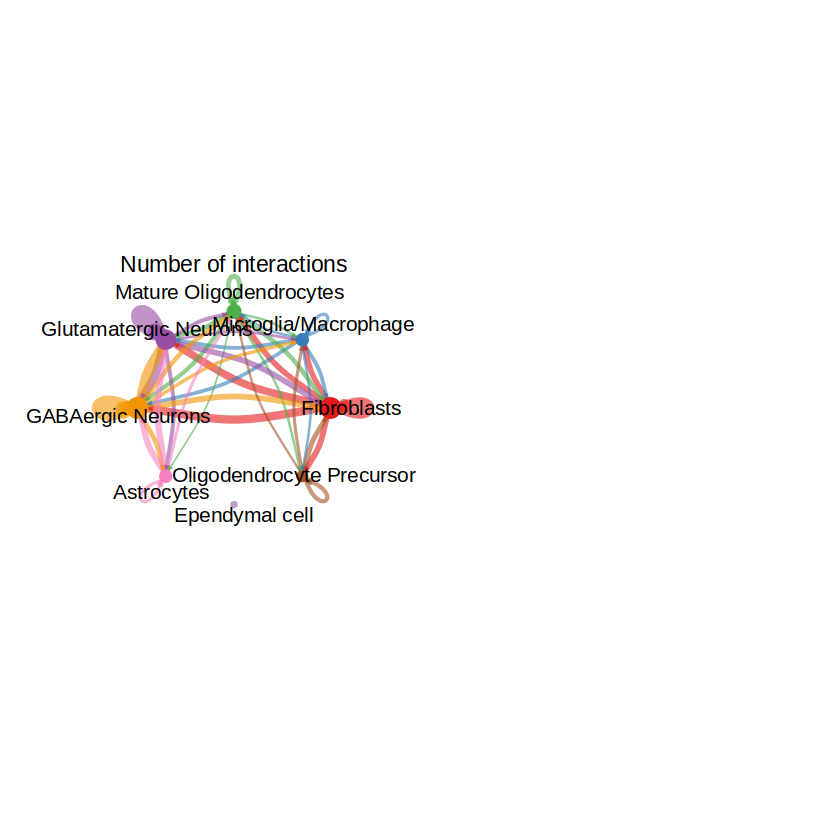

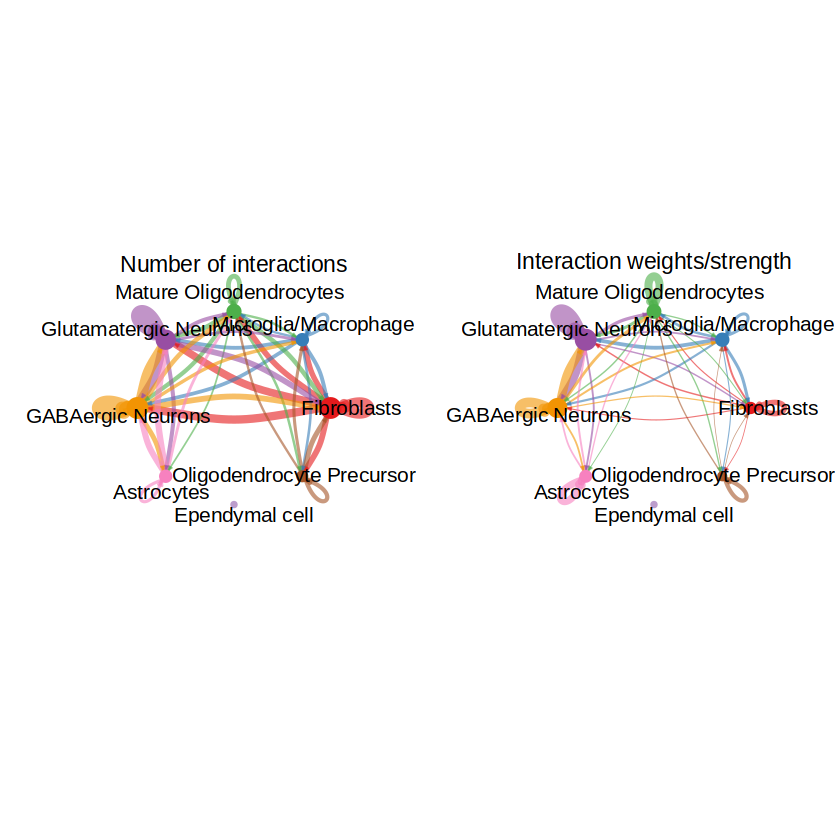

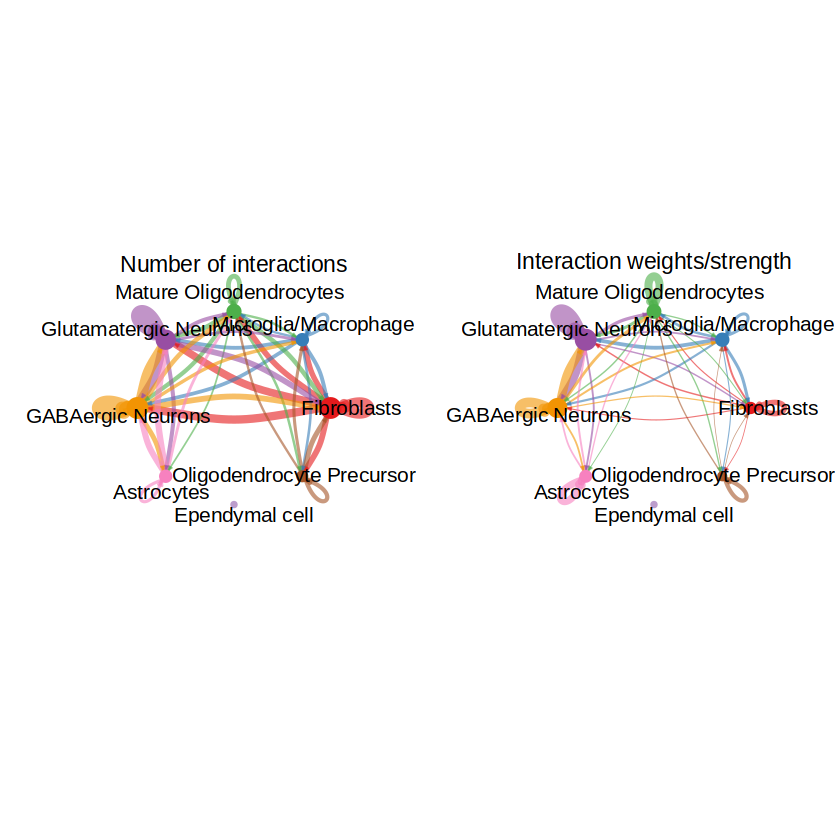

In [3]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = rowSums(cellchat@net$count), weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = rowSums(cellchat@net$weight), weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

Do heatmap based on a single object 




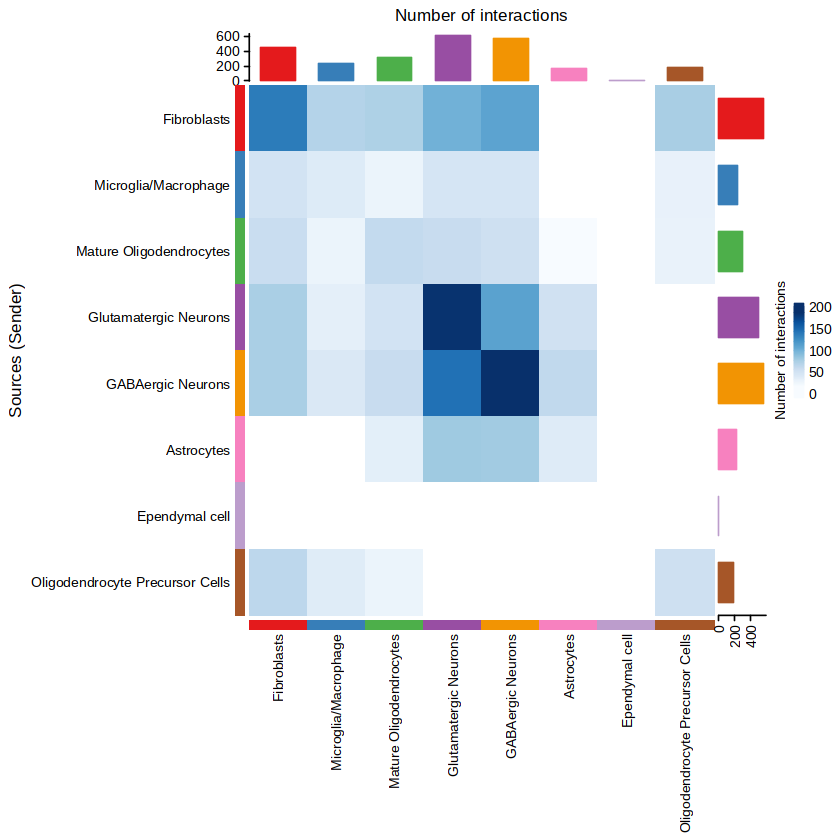

In [4]:
netVisual_heatmap(cellchat, measure = "count", color.heatmap = "Blues")
#> Do heatmap based on a single object

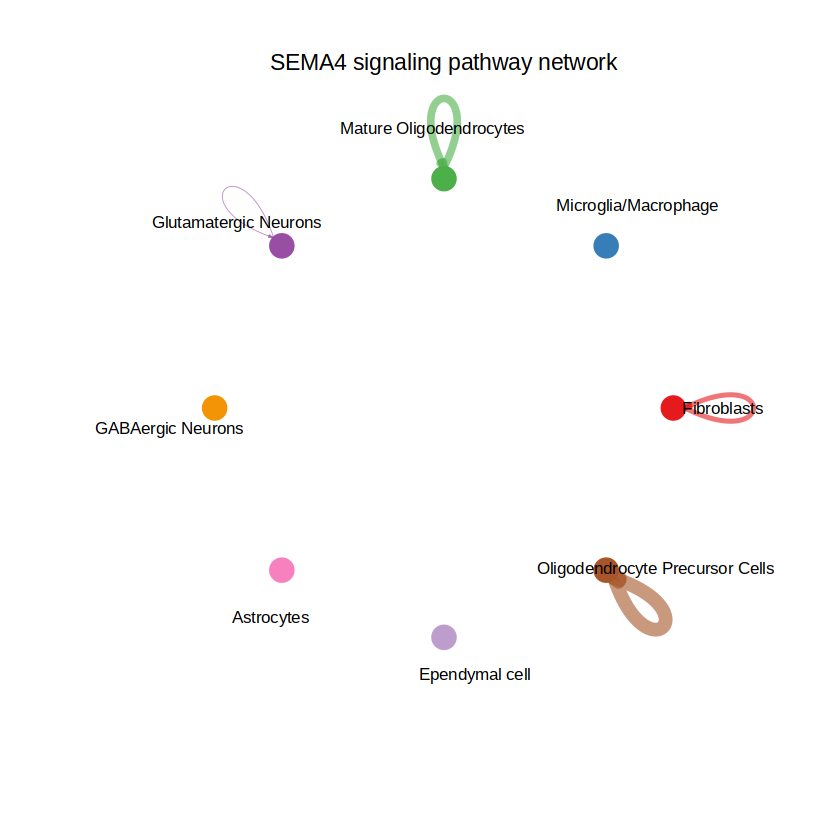

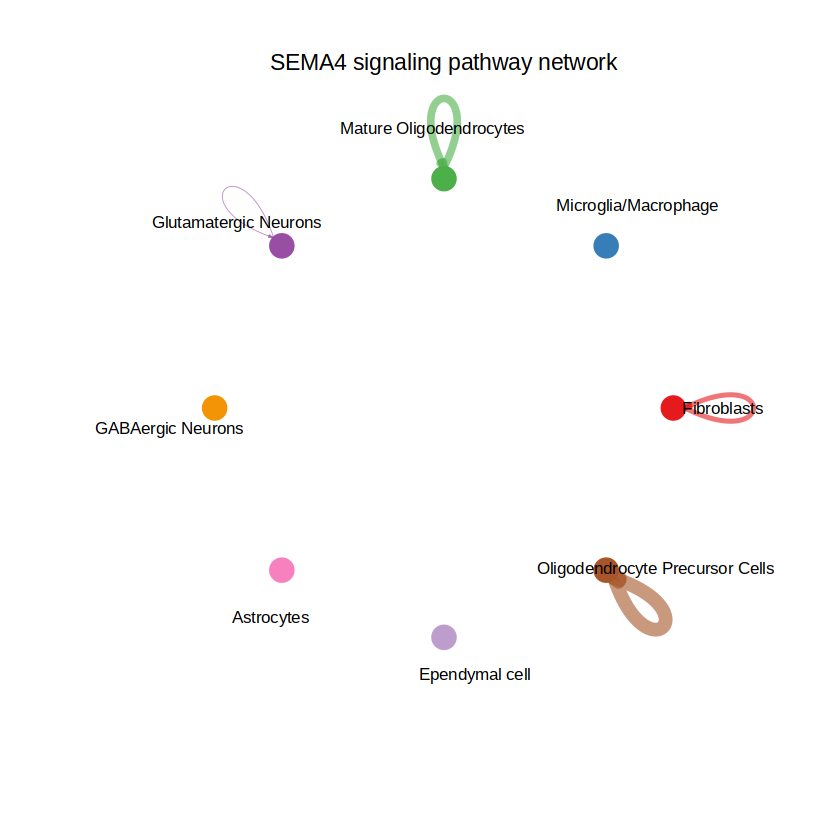

In [3]:
pathways.show <- c("SEMA4") 
# Circle plot
par(mfrow=c(1,1), xpd=TRUE)
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

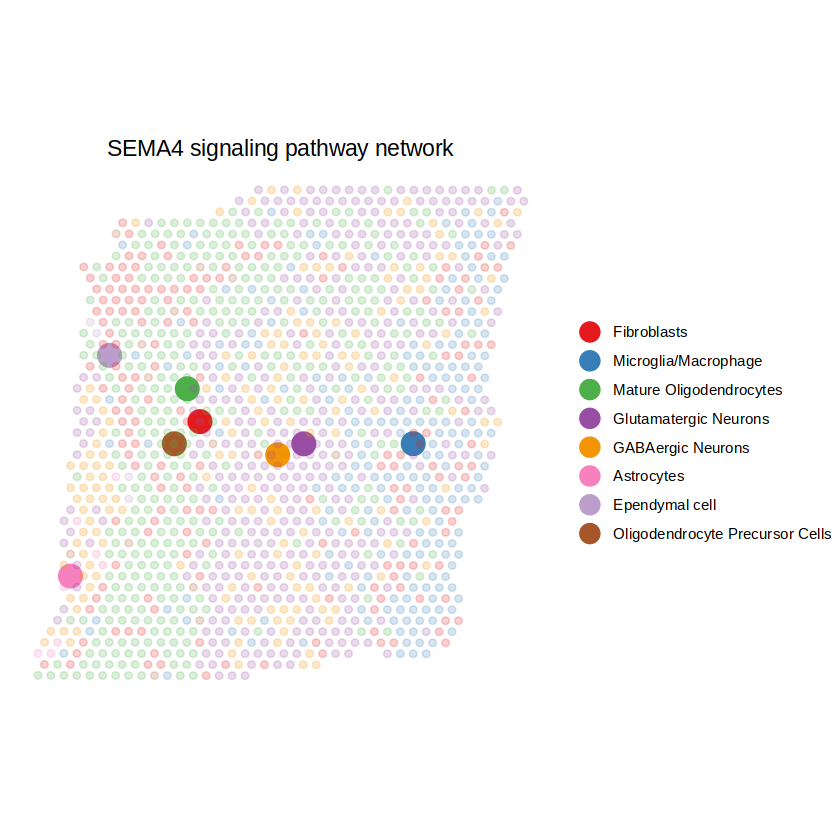

In [9]:
# Spatial plot
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, sample.use = "model1", layout = "spatial", edge.width.max = 2, vertex.size.max = 1, alpha.image = 0.2, vertex.label.cex = 0)

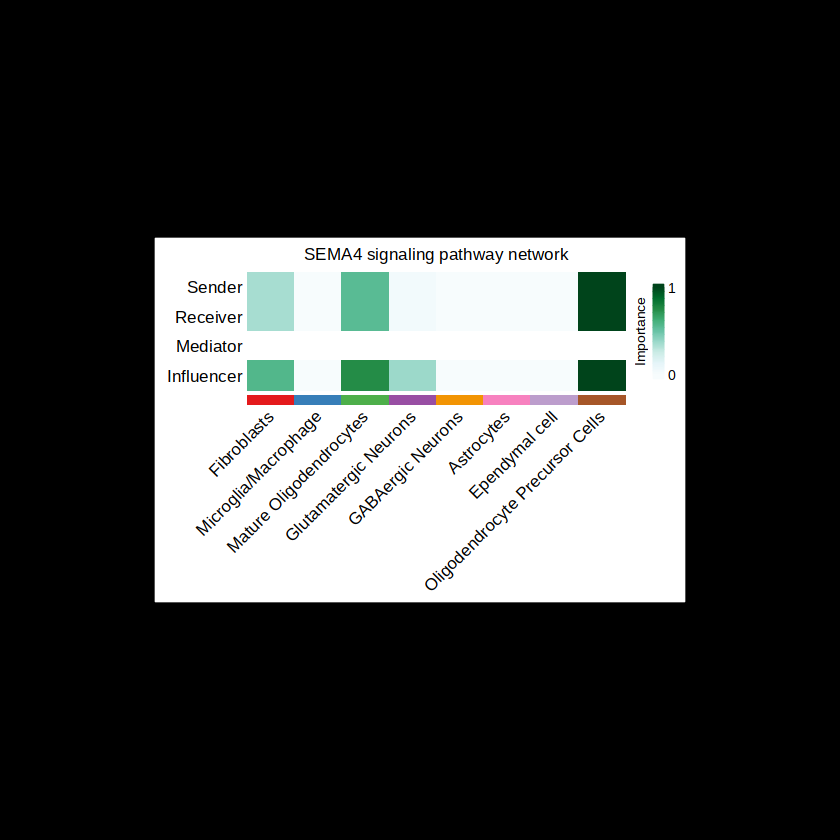

In [10]:
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
par(mfrow=c(1,1))
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)

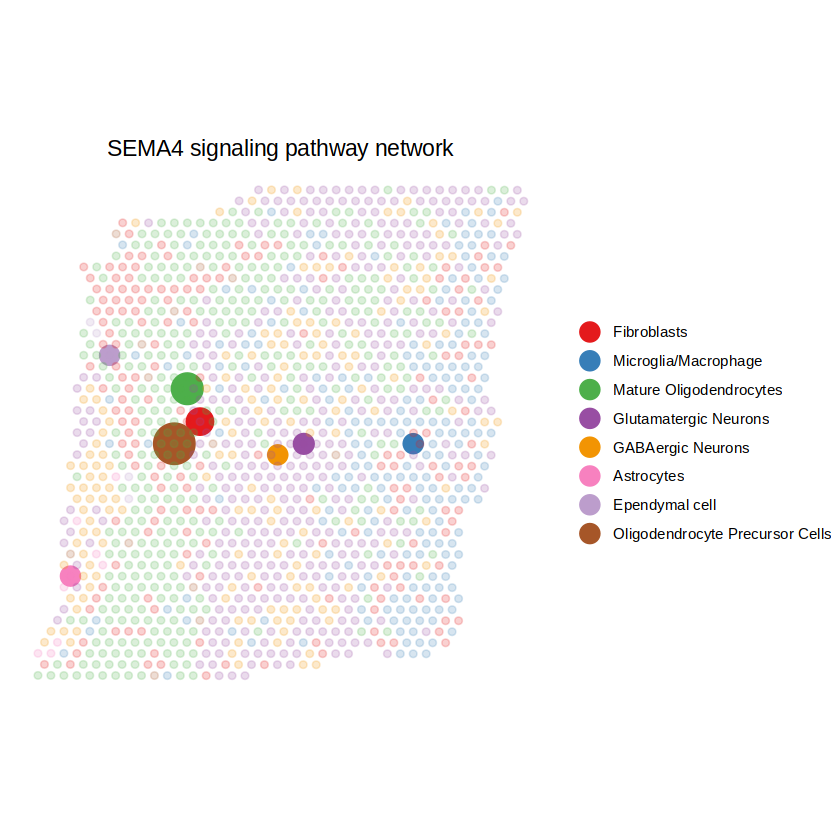

In [23]:
# USER can show this information on the spatial transcriptomics when visualizing a signaling network, e.g., bigger circle indicates larger incoming signaling
par(mfrow=c(1,1))
netVisual_aggregate(cellchat, signaling = pathways.show, sample.use = "model1", layout = "spatial", edge.width.max = 2, alpha.image = 0.2, vertex.weight = "incoming", vertex.size.max = 6, vertex.label.cex = 0)

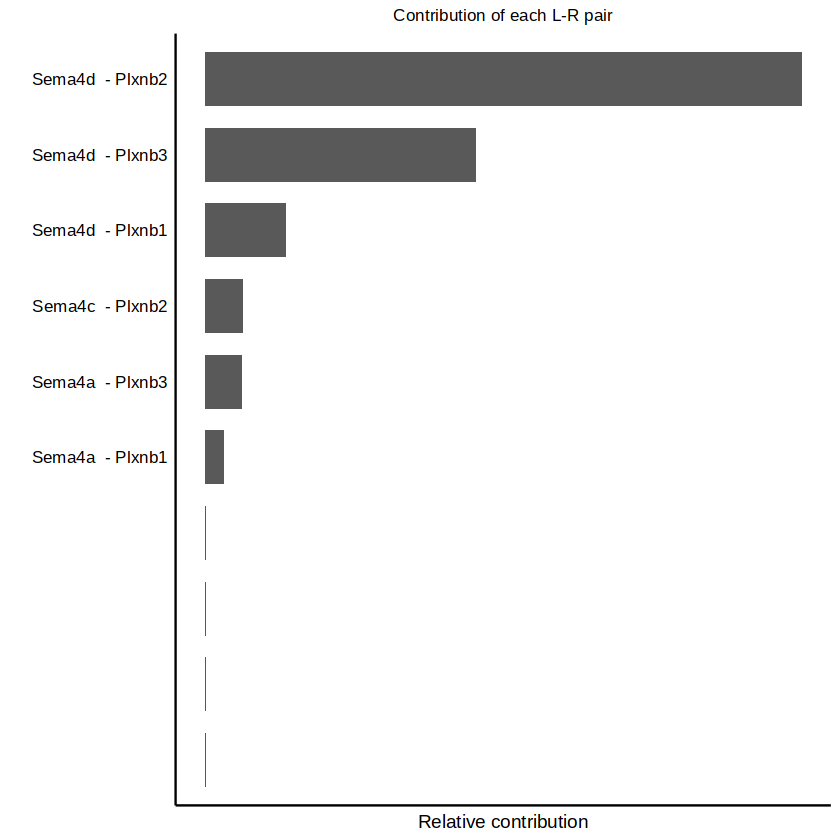

In [5]:
p = netAnalysis_contribution(cellchat, signaling = pathways.show)
p

In [6]:
p$data

,name,contribution
,<fct>,<dbl>
SEMA4D_PLXNB2,Sema4d - Plxnb2,0.57405586
SEMA4D_PLXNB3,Sema4d - Plxnb3,0.26052674
SEMA4D_PLXNB1,Sema4d - Plxnb1,0.07769651
SEMA4C_PLXNB2,Sema4c - Plxnb2,0.03537253
SEMA4A_PLXNB3,Sema4a - Plxnb3,0.03518415
SEMA4A_PLXNB1,Sema4a - Plxnb1,0.01716421
1,1,0.00000000
2,2,0.00000000
3,3,0.00000000


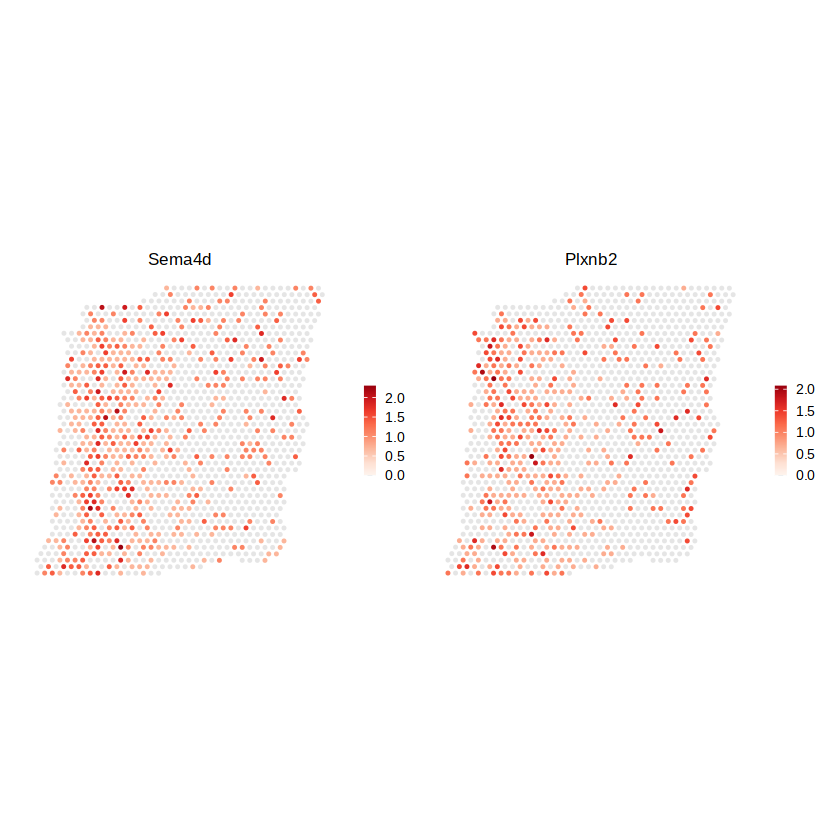

In [25]:
# Take an input of a few genes
spatialFeaturePlot(cellchat, features = c("Sema4d","Plxnb2"), sample.use = "model1", point.size = 0.8, color.heatmap = "Reds", direction = 1)

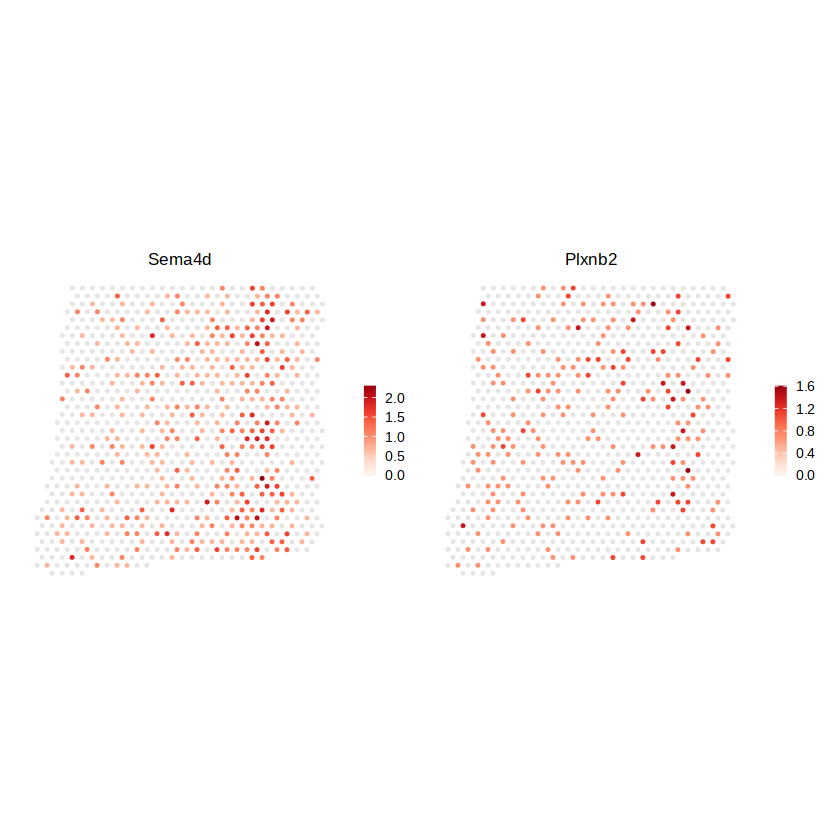

In [15]:
# Take an input of a few genes
spatialFeaturePlot(cellchat, features = c("Sema4d","Plxnb2"), sample.use = "model2", point.size = 0.8, color.heatmap = "Reds", direction = 1)

Applying a cutoff of  0.05 to the values... 


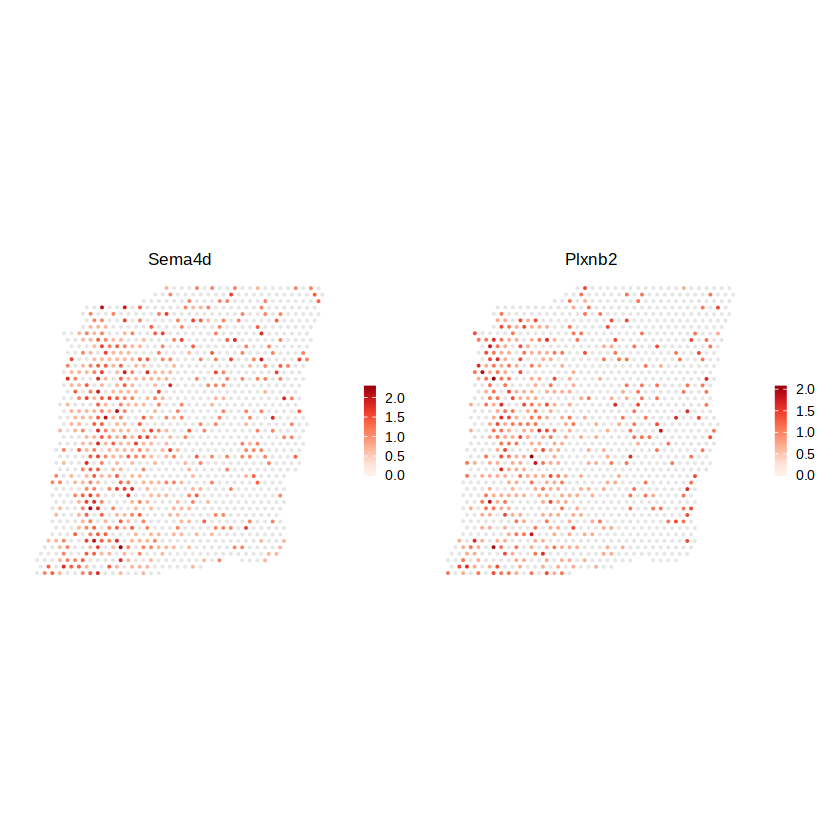

In [29]:
# Take an input of a ligand-receptor pair
spatialFeaturePlot(cellchat, pairLR.use = "SEMA4D_PLXNB2", sample.use = "model1", point.size = 0.5, do.binary = FALSE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)
#> Applying a cutoff of  0.05 to the values...

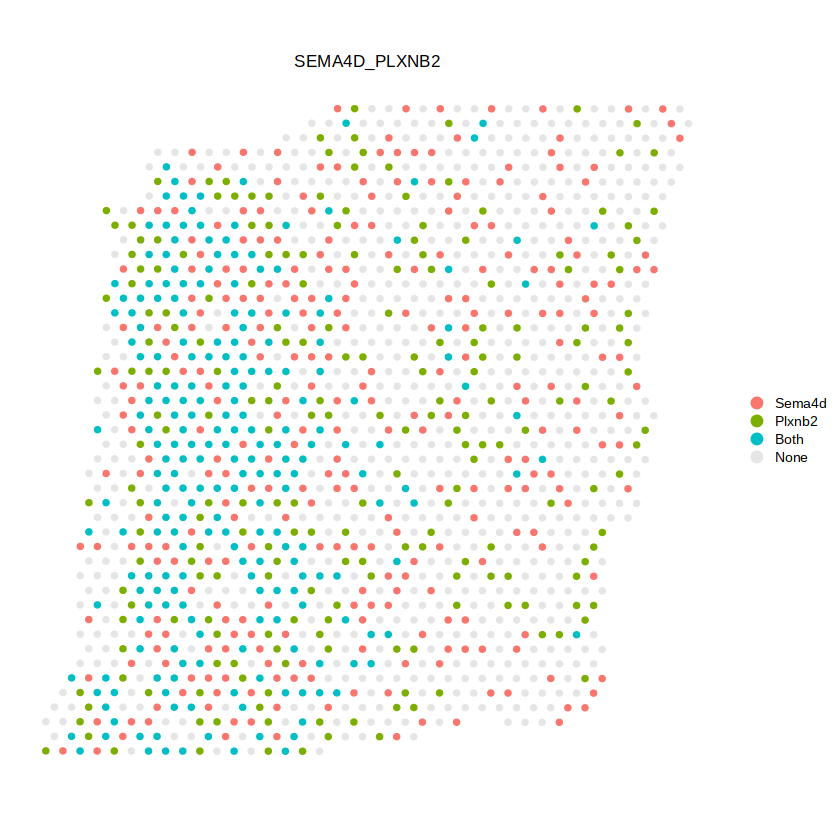

In [28]:
# Take an input of a ligand-receptor pair and show expression in binary
spatialFeaturePlot(cellchat, pairLR.use = "SEMA4D_PLXNB2", sample.use = "model1", point.size = 1.5, do.binary = TRUE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

In [18]:
saveRDS(cellchat, file = "/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/cellchat_model_2.rds")